In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker, cm 
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os, sys
import scipy.io.netcdf as nc
import netCDF4
from scipy.interpolate import PchipInterpolator
import getGfileDict
# from omfit_classes import omfit_eqdsk
# from omfit_classes import utils_fusion
import equilibrium_process as eqdsk
import f90nml
from periodictable import elements

#'This should work'

In [10]:
# load in the namelist
toricnml=f90nml.read('torica.inp')
def get_spec_toric(toricnml):
    "Collect info on species for ICRF sim in TORIC in nice readable format"
    
    spec_toric=list(zip(map(round,toricnml['equidata']['atm']),map(int,toricnml['equidata']['azi'])))
    for i,s in enumerate(spec_toric):
      name=str(elements[s[1]][s[0]])
      print('---------------------')
      print('name', name)
      print('A',spec_toric[i][0])
      print('Z',spec_toric[i][1])
      print('Conc%',100*toricnml['equidata']['aconc'][i])
      print('---------------------\n')
      spec_toric[i]={'name':name,'A':spec_toric[i][0],'Z':spec_toric[i][1],'Conc%':100*toricnml['equidata']['aconc'][i]}
    
    spec_toric.insert(0,{'name':'e', 'A':0, 'Z':-1 , 'Conc%': 100})
    return spec_toric

spec_toric=get_spec_toric(toricnml)
#nspec=len(spec_toric)
spec_toric

---------------------
name D
A 2
Z 1
Conc% 0.0
---------------------

---------------------
name T
A 3
Z 1
Conc% 0.0
---------------------

---------------------
name 83-Kr
A 83
Z 36
Conc% 0.0
---------------------

---------------------
name 3-He
A 3
Z 2
Conc% 0.0
---------------------



KeyError: '0 is not an isotope of n'

In [23]:
species_names = ['D', 'T', 'Kr', 'He-3']

In [11]:
cql_nc = netCDF4.Dataset('cql3d.nc', mmap=False )

In [12]:
# Modules
#from transport_world.run_TORIC.output_utils import toric_tools

import toric_tools

# Enables automatic reloading of modules
%reload_ext autoreload
%autoreload 2

In [13]:
toric_nc = netCDF4.Dataset('fort.21')

In [14]:
toric = toric_tools.toric_analysis(
    toric_name='fort.21',#'/home/vandelij/conor_toric/forJACOB/toric.ncdf',
    #toric_name='/home/vandelij/conor_toric/forJACOB/toric.ncdf',#'/home/cjperks/2201_Pumpout/CMOD/shots/1140221013/toric_test.ncdf',
    mode='ICRF',
    path='/home/vandelij/conor_toric/forJACOB/'   #'/home/cjperks/2201_Pumpout/CMOD/shots/1140221013/'
    )

Non-CRITICAL:  /home/vandelij/conor_toric/forJACOB/toric_qlde.cdf  not found.


In [15]:
print(cql_nc.variables.keys())
print(toric_nc.variables.keys())
print(toric.cdf_hdl.variables.keys())


dict_keys(['version', 'mnemonic', 'ampfmod', 'urfmod', 'rdcmod', 'frmod', 'beamplse', 'transp', 'tavg', 'f4d_out', 'netcdfshort', 'eqdskin', 'ngen', 'ntotal', 'kspeci', 'bnumb', 'fmass', 'lrzmax', 'radcoord', 'rya', 'Rp', 'Rm', 'rhomax', 'radmaj', 'rpmconz', 'btor', 'toteqd', 'rgeomp', 'r0geomp', 'rmag', 'zmag', 'eqsym', 'zshift', 'eps0', 'elong', 'zgeomp', 'rgeom1', 'rgeom2', 'area', 'darea', 'vol', 'dvol', 'equilpsi', 'psivalm', 'dpsi', 'psimag', 'psilim', 'h_r', 'qsafety', 'curreq', 'lrz', 'lrindx', 'jx', 'x', 'enerkev', 'uoc', 'dx', 'cint2', 'vnorm', 'enorm', 'iy', 'y', 'dy', 'cynt2', 'iy_', 'itl', 'itu', 'lz', 'z', 'dz', 'solrz', 'solzz', 'pol', 'bbpsi', 'imax', 'lmax', 'zboun', 'zmaxpsi', 'tau', 'dtau', 'beampon', 'beampoff', 'tavg1', 'tavg2', 'ndeltarho', 'bthr', 'btoru', 'btor0', 'bmidplne', 'efflag', 'softxry', 'ipronn', 'gamafac', 'pellet', 'imp_type', 'nstates', 'fmass_imp', 'pellet_M0', 'pellet_Cablation', 'npa_diag', 'sigmamod', 'isigmas', 'mmsv', 'isigsgv1', 'isigsgv2', '

(512, 503)
(512, 503)
(512, 503)
(512, 503, 4)
(512, 503, 4)


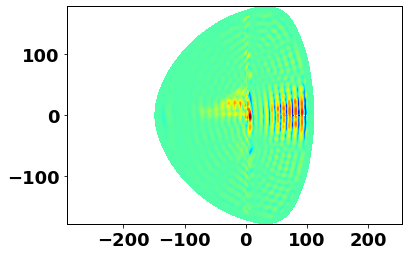

In [28]:
# section to make plots of the fields 

Re2Eplus = toric.cdf_hdl.variables['Re2Eplus'][:]
#Eplus = toric.cdf_hdl.variables['Eplus']
Xmesh = toric.cdf_hdl.variables['Xplasma'][:]
Zmesh = toric.cdf_hdl.variables['Zplasma'][:]
TDPwIF = toric.cdf_hdl.variables['TDPwIF'][:]
TdPwIH = toric.cdf_hdl.variables['TdPwIH'][:]
print(Re2Eplus.shape)
print(Xmesh.shape)
print(Zmesh.shape)
#print(Eplus.shape)
print(TDPwIF.shape)
print(TdPwIH.shape)
plt.axis('equal')
plt.contourf(Xmesh,Zmesh, Re2Eplus, levels=300, cmap='jet')

Fundimental absorption


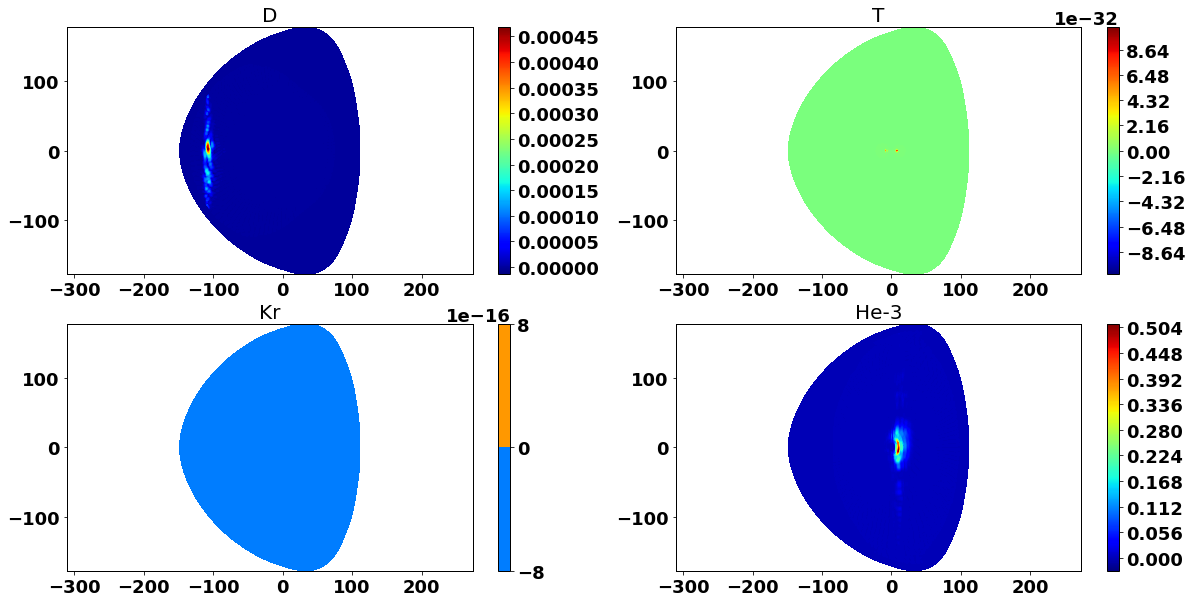

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
print('Fundimental absorption')
axs[0,0].axis('equal')
axs[0,1].axis('equal')
axs[1,0].axis('equal')
axs[1,1].axis('equal')
s1 = axs[0,0].contourf(Xmesh,Zmesh, TDPwIF[:,:,0], levels=300, cmap='jet')
axs[0,0].set_title(species_names[0])
plt.colorbar(s1, ax=axs[0,0])
s2 = axs[0,1].contourf(Xmesh,Zmesh, TDPwIF[:,:,1], levels=300, cmap='jet')
axs[0,1].set_title(species_names[1])
plt.colorbar(s2, ax=axs[0,1])
s3 = axs[1,0].contourf(Xmesh,Zmesh, TDPwIF[:,:,2], levels=300, cmap='jet')
axs[1,0].set_title(species_names[2])
plt.colorbar(s3, ax=axs[1,0])
s4 = axs[1,1].contourf(Xmesh,Zmesh, TDPwIF[:,:,3], levels=300, cmap='jet')
axs[1,1].set_title(species_names[3])
plt.colorbar(s4, ax=axs[1,1])

Harmonic absorption


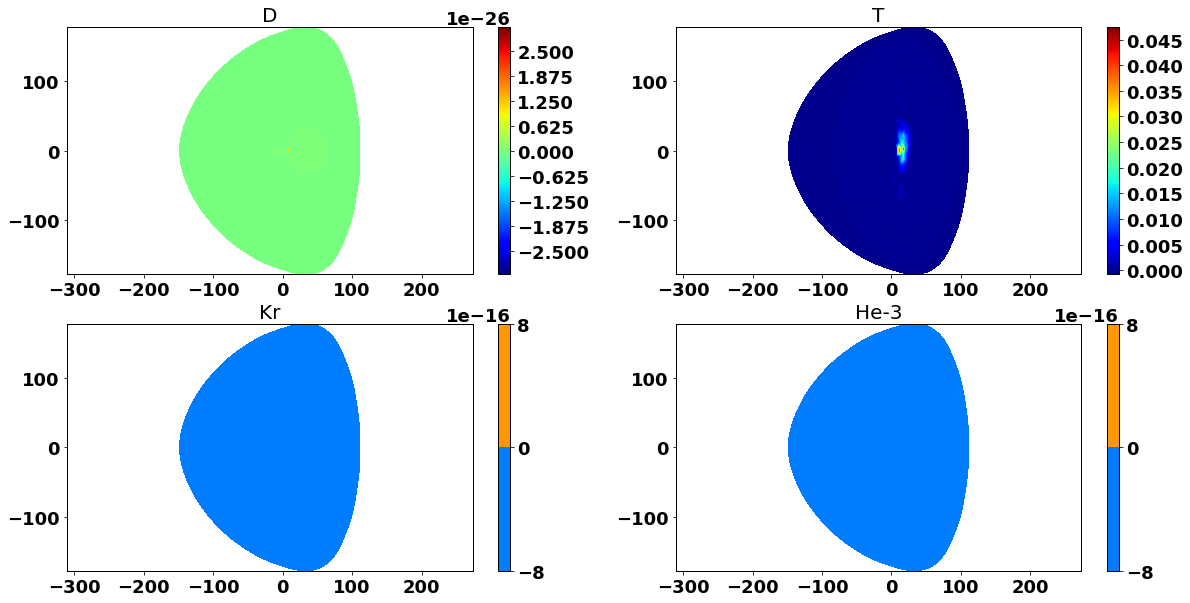

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
print('Harmonic absorption')
axs[0,0].axis('equal')
axs[0,1].axis('equal')
axs[1,0].axis('equal')
axs[1,1].axis('equal')
s1 = axs[0,0].contourf(Xmesh,Zmesh, TdPwIH[:,:,0], levels=300, cmap='jet')
axs[0,0].set_title(species_names[0])
plt.colorbar(s1, ax=axs[0,0])
s2 = axs[0,1].contourf(Xmesh,Zmesh, TdPwIH[:,:,1], levels=300, cmap='jet')
axs[0,1].set_title(species_names[1])
plt.colorbar(s2, ax=axs[0,1])
s3 = axs[1,0].contourf(Xmesh,Zmesh, TdPwIH[:,:,2], levels=300, cmap='jet')
axs[1,0].set_title(species_names[2])
plt.colorbar(s3, ax=axs[1,0])
s4 = axs[1,1].contourf(Xmesh,Zmesh, TdPwIH[:,:,3], levels=300, cmap='jet')
axs[1,1].set_title(species_names[3])
plt.colorbar(s4, ax=axs[1,1])

In [ ]:
# electron treatment 

2D Matrix shape: (512, 503)
values [  0.          27.57492069  55.14984138  82.72476207 110.29968277
 137.87460346 165.44952415 193.02444484 220.59936553 248.17428622
 275.74920691 303.32412761 330.8990483  358.47396899 386.04888968
 413.62381037 441.19873106 468.77365175 496.34857244 523.92349314
 551.49841383 579.07333452 606.64825521 634.2231759  661.79809659
 689.37301728 716.94793798]
plot aspect ratio: 1.3705771611479438
c:\Users\Jacob\Desktop\MANTA_toric/fort.21
interactive off while plotting
interactive on
contour values [  0.          22.05993655  44.11987311  66.17980966  88.23974621
 110.29968277 132.35961932 154.41955587 176.47949242 198.53942898
 220.59936553 242.65930208 264.71923864 286.77917519 308.83911174
 330.8990483  352.95898485 375.0189214  397.07885796 419.13879451
 441.19873106 463.25866762 485.31860417 507.37854072 529.43847727
 551.49841383 573.55835038] xx 661.798096592922 0.0


(<matplotlib.contour.QuadContourSet at 0x26c07a398b0>,
 <matplotlib.colorbar.Colorbar at 0x26c086237f0>)

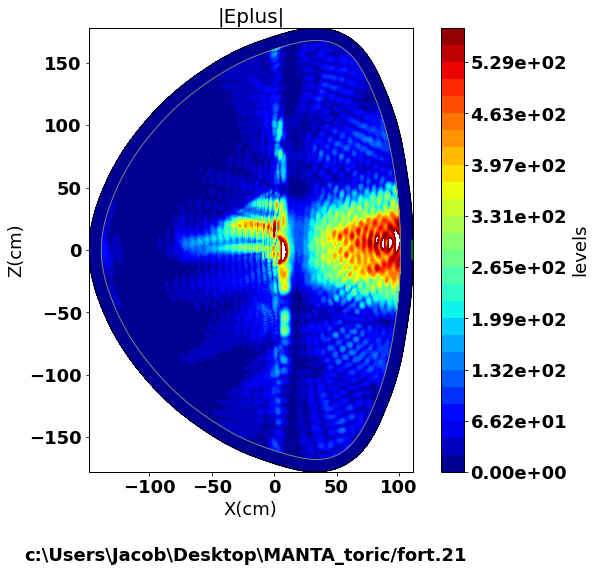

In [9]:
toric.plot_2Dfield('Eplus',logl=-20, im=True, scaletop=0.8)

2D Matrix shape: (512, 503)
plot aspect ratio: 1.3705771611479438
c:\Users\Jacob\Desktop\MANTA_toric/fort.21
interactive off while plotting
interactive on
contour values [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3. ] xx 656.0219430984897 -673.6563223572309


(<matplotlib.contour.QuadContourSet at 0x26c075e3b50>,
 <matplotlib.colorbar.Colorbar at 0x26c0c3a3070>)

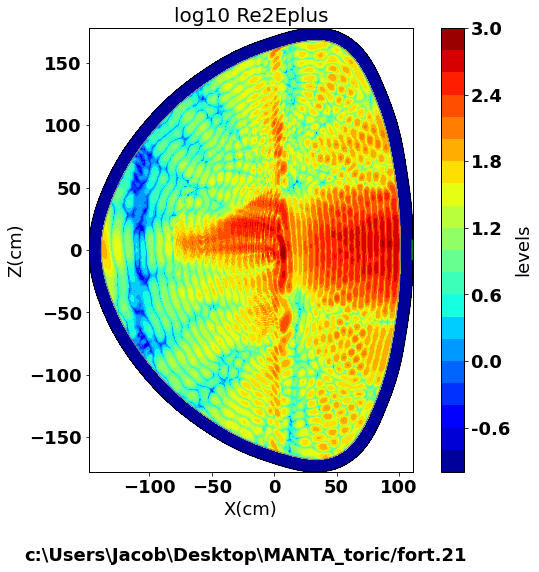

In [10]:
toric.plot_2Dfield('Re2Eplus',logl=20, scaletop=0.8)

plot2D, indexing species 1
2D Matrix shape: (512, 503)
plot aspect ratio: 1.3705771611479438
c:\Users\Jacob\Desktop\MANTA_toric/fort.21
interactive off while plotting
interactive on
contour values [-3.39631902e-26 -3.14931400e-26 -2.90230898e-26 -2.65530396e-26
 -2.40829894e-26 -2.16129392e-26 -1.91428890e-26 -1.66728388e-26
 -1.42027886e-26 -1.17327384e-26 -9.26268823e-27 -6.79263803e-27
 -4.32258784e-27 -1.85253765e-27  6.17512549e-28  3.08756274e-27
  5.55761294e-27  8.02766313e-27  1.04977133e-26  1.29677635e-26
  1.54378137e-26  1.79078639e-26  2.03779141e-26  2.28479643e-26
  2.53180145e-26  2.77880647e-26  3.02581149e-26  3.27281651e-26] xx 3.087562742971881e-26 -3.0523058526194566e-26


(<matplotlib.contour.QuadContourSet at 0x27bbbd52160>,
 <matplotlib.colorbar.Colorbar at 0x27bbd133100>)

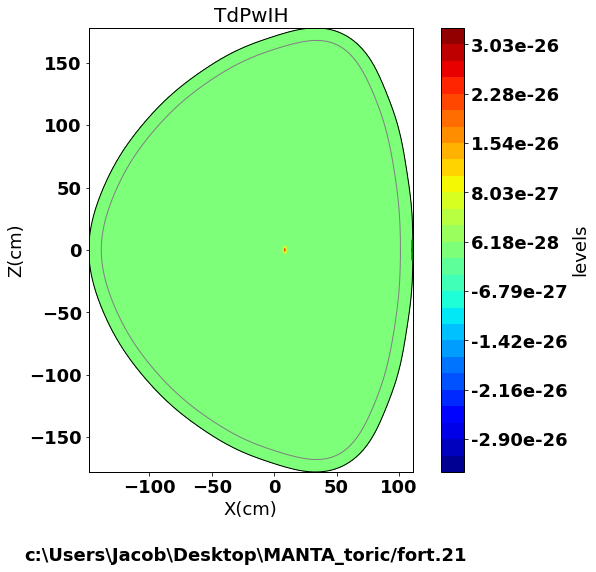

In [21]:
toric.plot_2Dfield('TdPwIH',species=1)

In [7]:
# Plots the electron absorbed power from FW
# %matplotlib inline
# toric.plotpower()

In [8]:
# # Plots the electron absorbed power from IBW
# toric.plotpower(power='PwEIBW')

In [9]:
# Plots the ion absorbed power from fundamental for species 2
# toric.plotpower(power='PwIF', species=4)

(462,)
total power He3:  87.60209394144692
(462,)


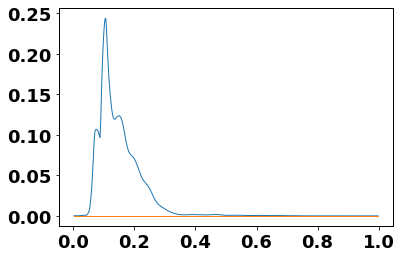

In [10]:
sqrt_pol = toric.cdf_hdl.variables['Pw_abscissa'][:]
print(sqrt_pol.shape)
species_index=4
power_He3_pol = toric.cdf_hdl.variables['PwIF'][:, species_index-1]
total_power_He3 = toric.cdf_hdl.variables['TPwIF'][species_index-1]

power_He3_IH = toric.cdf_hdl.variables['PwIH'][:, species_index-1]
print('total power He3: ', total_power_He3)
print(power_He3_pol.shape)
#print(power_He3_pol)
#print(sqrt_pol)
plt.plot(sqrt_pol, power_He3_pol)
plt.plot(sqrt_pol, power_He3_IH)


In [11]:
MWabs = 40 # this value determines how much power was absorbed 

Total RF power to ions:  26.9196 MW
Total NB power to ions:  0.0 MW


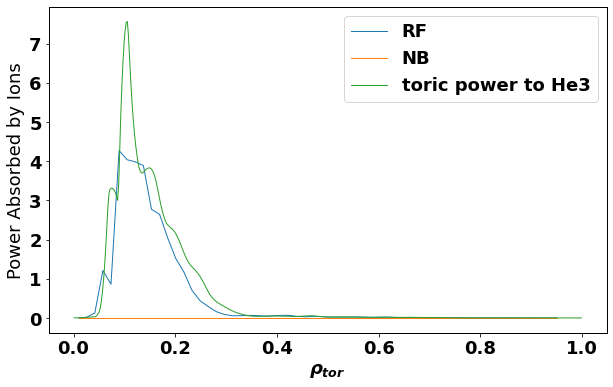

In [12]:
plt.figure(figsize=(10,6))
rya = cql_nc.variables["rya"][:]
dvol = cql_nc.variables['dvol'][:]
powers = cql_nc.variables['powers'][-1, 0, :, :]
powers_RF = powers[4, :]
powers_NB = powers[5, :]
plt.plot(rya, powers_RF, label='RF')
plt.plot(rya, powers_NB, label='NB')
total_RF_power_to_ions = np.trapz(powers_RF*dvol*(1/100)**3)
total_NB_power_to_ions = np.trapz(powers_NB*dvol*(1/100)**3)
print('Total RF power to ions: ', np.round(total_RF_power_to_ions, 4), 'MW')
print('Total NB power to ions: ', np.round(total_NB_power_to_ions, 4), 'MW')
plt.ylabel('Power Absorbed by Ions')
plt.xlabel(r'$\rho_{tor}$')

plt.plot(sqrt_pol, power_He3_pol*31, label='toric power to He3')
plt.legend()

total He3 power fundimental:  87.60209394144692
total He3 power 1st harmonic:  0.0


Text(0.5, 1.0, 'He3')

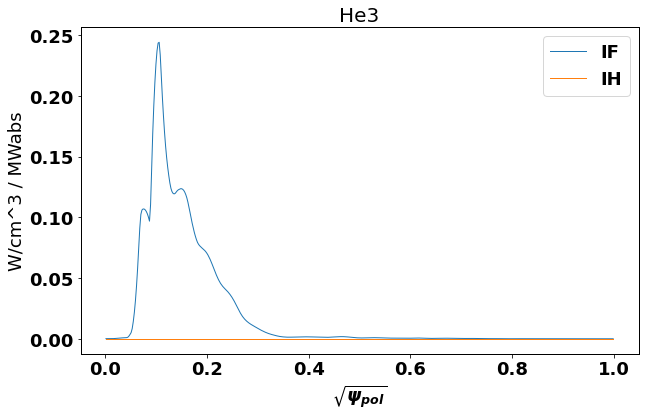

In [13]:
# Meat and potatoes. Calculate the profiles over rho_pol to 
# 1. Each ion species, fundimental
# 2. Each ion species, 1st Harmonic
# 3. Electrons, Fast Wave
# 4. Electrons, IB wave
plt.figure(figsize=(10,6))
species = ['D', 'T', 'Kr', 'He3']
# Species 4: He3
species_index = 4
power_He3_IF_pol = toric.cdf_hdl.variables['PwIF'][:, species_index-1]
total_power_He3_IF = toric.cdf_hdl.variables['TPwIF'][species_index-1]
power_He3_IH_pol = toric.cdf_hdl.variables['PwIH'][:, species_index-1]
total_power_He3_IH = toric.cdf_hdl.variables['TPwIH'][species_index-1]
print('total He3 power fundimental: ', total_power_He3_IF)
print('total He3 power 1st harmonic: ', total_power_He3_IH)

plt.plot(sqrt_pol, power_He3_IF_pol, label='IF')
plt.plot(sqrt_pol, power_He3_IH_pol, label='IH')
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel('W/cm^3 / MWabs')
plt.legend()
plt.title(species[species_index-1])

total D power fundimental:  0.04741173240332704
total D power 1st harmonic:  0.0


Text(0.5, 1.0, 'D')

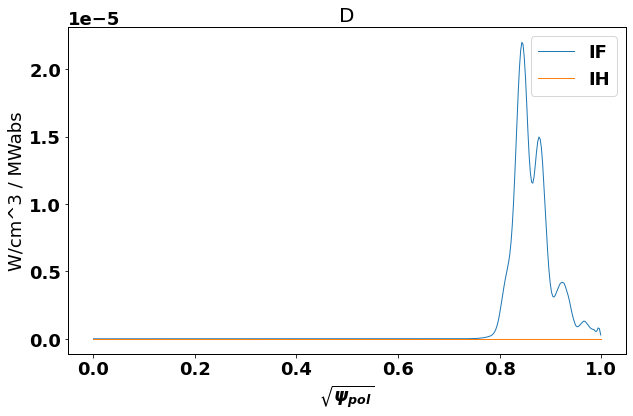

In [14]:
# Species 1: D
plt.figure(figsize=(10,6))
species_index = 1
power_D_IF_pol = toric.cdf_hdl.variables['PwIF'][:, species_index-1]
total_power_D_IF = toric.cdf_hdl.variables['TPwIF'][species_index-1]
power_D_IH_pol = toric.cdf_hdl.variables['PwIH'][:, species_index-1]
total_power_D_IH = toric.cdf_hdl.variables['TPwIH'][species_index-1]
print('total D power fundimental: ', total_power_D_IF)
print('total D power 1st harmonic: ', total_power_D_IH)

plt.plot(sqrt_pol, power_D_IF_pol, label='IF')
plt.plot(sqrt_pol, power_D_IH_pol, label='IH')
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel('W/cm^3 / MWabs')
plt.legend()
plt.title(species[species_index-1])

total T power fundimental:  0.04741173240332704
total T power 1st harmonic:  0.0


Text(0.5, 1.0, 'T')

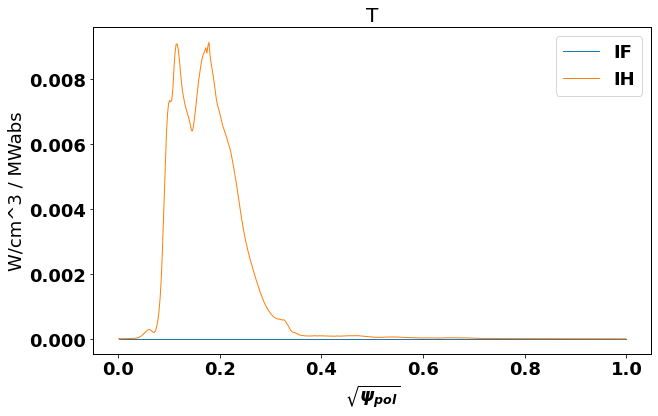

In [15]:
# Species 2: T
plt.figure(figsize=(10,6))
species_index = 2
power_T_IF_pol = toric.cdf_hdl.variables['PwIF'][:, species_index-1]
total_power_T_IF = toric.cdf_hdl.variables['TPwIF'][species_index-1]
power_T_IH_pol = toric.cdf_hdl.variables['PwIH'][:, species_index-1]
total_power_T_IH = toric.cdf_hdl.variables['TPwIH'][species_index-1]
print('total T power fundimental: ', total_power_D_IF)
print('total T power 1st harmonic: ', total_power_D_IH)

plt.plot(sqrt_pol, power_T_IF_pol, label='IF')
plt.plot(sqrt_pol, power_T_IH_pol, label='IH')
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel('W/cm^3 / MWabs')
plt.legend()
plt.title(species[species_index-1])

total Kr power fundimental:  0.04741173240332704
total Kr power 1st harmonic:  0.0


Text(0.5, 1.0, 'Kr')

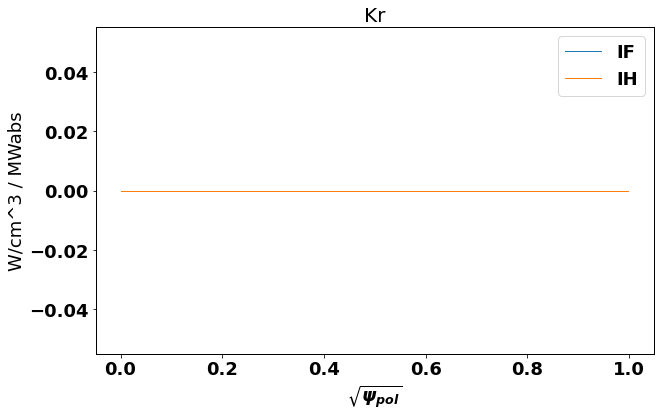

In [16]:
# Species 3: Kr
plt.figure(figsize=(10,6))
species_index = 3
power_Kr_IF_pol = toric.cdf_hdl.variables['PwIF'][:, species_index-1]
total_power_Kr_IF = toric.cdf_hdl.variables['TPwIF'][species_index-1]
power_Kr_IH_pol = toric.cdf_hdl.variables['PwIH'][:, species_index-1]
total_power_Kr_IH = toric.cdf_hdl.variables['TPwIH'][species_index-1]
print('total Kr power fundimental: ', total_power_D_IF)
print('total Kr power 1st harmonic: ', total_power_D_IH)

plt.plot(sqrt_pol, power_Kr_IF_pol, label='IF')
plt.plot(sqrt_pol, power_Kr_IH_pol, label='IH')
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel('W/cm^3 / MWabs')
plt.legend()
plt.title(species[species_index-1])

total e power fast wave:  [5.43391784]
total e power IBW:  [0.66904913]


Text(0.5, 1.0, 'electrons')

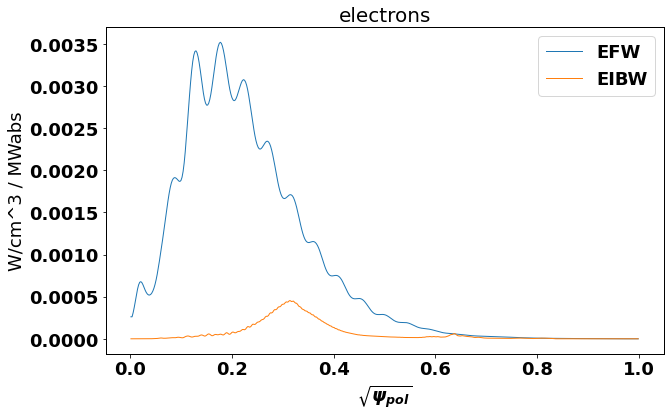

In [17]:
# Electrons
# Species 2: T
plt.figure(figsize=(10,6))
power_e_EFW_pol = toric.cdf_hdl.variables['PwE'][:]
total_power_e_EFW = toric.cdf_hdl.variables['TPwEFW'][:]
power_e_EIBW_pol = toric.cdf_hdl.variables['PwEIBW'][:]
total_power_e_EIBW = toric.cdf_hdl.variables['TPwEIBW'][:]
print('total e power fast wave: ', total_power_e_EFW)
print('total e power IBW: ', total_power_e_EIBW)

plt.plot(sqrt_pol, power_e_EFW_pol, label='EFW')
plt.plot(sqrt_pol, power_e_EIBW_pol, label='EIBW')
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel('W/cm^3 / MWabs')
plt.legend()
plt.title('electrons')

Total He3 power to maxwell e:  -2.0624 MW
Total He3 power to maxwell ions:  -20.494 MW
60


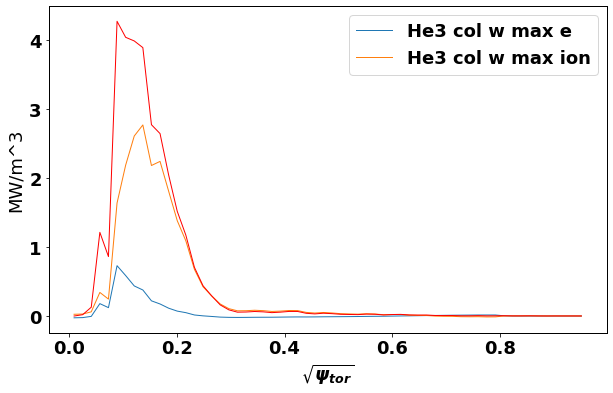

In [18]:
# now, use cql3d to figure out how much He3 power partitions into the bulk 
plt.figure(figsize=(10,6))
powers_to_max_e = powers[0, :]
plt.plot(rya, -1*powers_to_max_e, label='He3 col w max e')
total_RF_power_to_max_e = np.trapz(powers_to_max_e*dvol*(1/100)**3)
print('Total He3 power to maxwell e: ', np.round(total_RF_power_to_max_e, 4), 'MW')


powers_to_max_ions = powers[1, :]
plt.plot(rya, -1*powers_to_max_ions, label='He3 col w max ion')
total_RF_power_to_max_ions = np.trapz(powers_to_max_ions*dvol*(1/100)**3)
print('Total He3 power to maxwell ions: ', np.round(total_RF_power_to_max_ions, 4), 'MW')
plt.xlabel(r'$\sqrt{\psi_{tor}}$')
plt.ylabel('MW/m^3')

plt.plot(rya, powers_RF, 'r-')
plt.legend()

frac_He3_power_to_ions = powers_to_max_ions / powers_RF
frac_He3_power_to_electrons = powers_to_max_e / powers_RF
print(len(powers_to_max_ions))

ips-eqdsk.geq


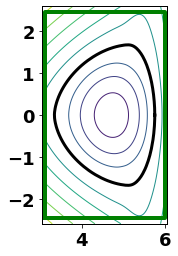

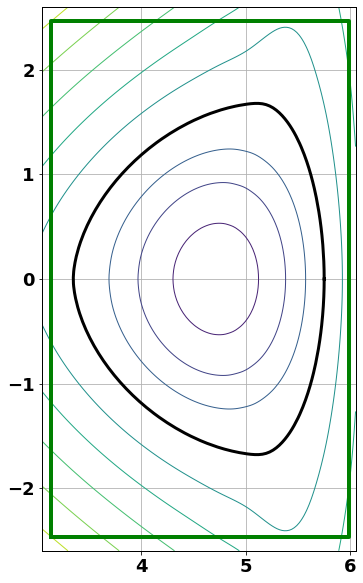

In [19]:
eqdsk_file='ips-eqdsk.geq'
print(eqdsk_file)
eq0,fig0=eqdsk.readGEQDSK(eqdsk_file,doplot=True,dolimiter=True);
plt.figure(fig0)
fig0.set_size_inches(10,10)
ax=fig0.get_axes()[0]
ax.grid()

In [20]:

# gfile='ips-eqdsk.geq'
# equig_file = 'ips-eqdsk.geq.equigs'
# geqxpl_output= !geqxpl @equigs_gen/g_filename=$gfile"/equigs_filename="$equigs_file


In [21]:
# geqxpl_output

In [22]:
# # print(rya)
# # print('--')
# # print(sqrt_pol)
# equigs_file = 'ips-eqdsk.geq'
# #eqdsk = getGfileDict.getGfileDict(equigs_file)
# gfile = omfit_eqdsk.OMFITgeqdsk(equigs_file)
# #toric.read_equigs(equigsfile=equigs_file)
# #print(toric.equigs.keys())
# #print(eqdsk.keys())
# rho_pol = np.sqrt(gfile['AuxQuantities']['PSI_NORM'])
# rho_tor = np.sqrt(gfile['AuxQuantities']['PHI_NORM'])
# rhopol = toric.equigs['srad'][:]
# rhotor = toric.equigs['rhotor']
# print(rhotor)

# map_tor_to_pol = interp1d(rhotor,rhopol,kind='cubic',bounds_error=False,fill_value=0.0)


In [23]:
# Renormalize cql3d to toric estimated energy controbutions
# TODO: ONLY RUN IN CQL#D DUBIOUS
He3_frac_toric = 0.8761

alpha = -40*0.87/(np.trapz((powers_to_max_e + powers_to_max_ions)*dvol*(1/100)**3))
print(alpha)

total_RF_power_to_max_ions = total_RF_power_to_max_ions*alpha
print('Total He3 power to maxwell ions: ', np.round(total_RF_power_to_max_ions, 4), 'MW')
total_RF_power_to_max_e = total_RF_power_to_max_e*alpha
print('Total He3 power to maxwell e: ', np.round(total_RF_power_to_max_e, 4), 'MW')

powers_to_max_e = powers_to_max_e * alpha
powers_to_max_ions = powers_to_max_ions*alpha


1.5427973370943395
Total He3 power to maxwell ions:  -31.6182 MW
Total He3 power to maxwell e:  -3.1818 MW


60
60
60


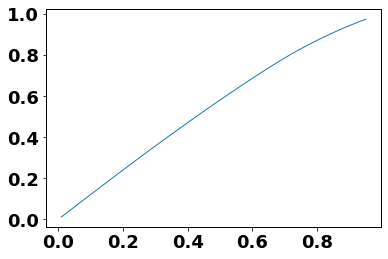

In [24]:
# convert rya (rho_tor to rho_pol)
rya = cql_nc.variables["rya"][:]
def convert(rho1,rho2,prof1):
    prof1fun = PchipInterpolator(rho1,prof1)
    rhoconvfun = PchipInterpolator(rho2,rho1)
    prof2 = prof1fun(rhoconvfun(rho2))
    prof2fun = PchipInterpolator(rho2,prof2)
    #assert np.all(prof1fun(rho1)-prof2fun(rho2) == 0)
    return prof2fun

# tor_to_pol = PchipInterpolator(rya, sqrt_pol)
# rya_pol = tor_to_pol(rya)
rhopol = np.loadtxt('rhopol.txt')
rhotor = np.loadtxt('rhotor.txt')

map_tor_to_pol = PchipInterpolator(rhotor, rhopol)
map_pol_to_tor = PchipInterpolator(rhopol, rhotor)
rya_pol = map_tor_to_pol(rya)
print(len(rya_pol))
powers_to_max_e_pol = -convert(rya, rya_pol, powers_to_max_e)(sqrt_pol)
print(len(powers_to_max_ions))
print(len(rya_pol))
powers_to_max_ions_pol = -convert(rya, rya_pol, powers_to_max_ions)(sqrt_pol)

plt.plot(rya,rya_pol)

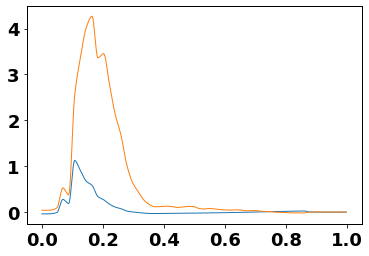

In [25]:
plt.plot(sqrt_pol, powers_to_max_e_pol)
plt.plot(sqrt_pol, powers_to_max_ions_pol)

total power to electrons:  [5.62302841] MW


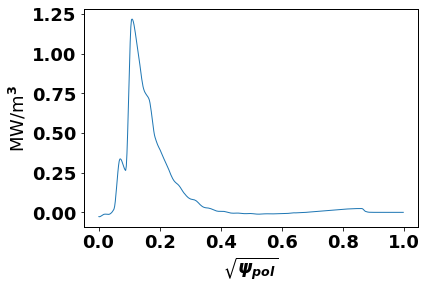

In [26]:
# now, start adding together all controbutions to ions and electrons and save to file. 
MWabs = 40

# electron power = fast wave + IBW + slowing down of He3
electron_power_array = (power_e_EFW_pol + power_e_EIBW_pol)*MWabs + powers_to_max_e_pol

plt.plot(sqrt_pol, electron_power_array)
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel(r'MW/m$^3$')
total_electron_heating = -total_RF_power_to_max_e + MWabs*(total_power_e_EFW + total_power_e_EIBW)/100
print('total power to electrons: ', total_electron_heating, 'MW')


Total bulk ion heating:  34.13613401638099 MW


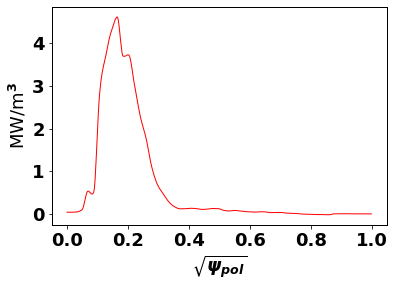

In [27]:
ion_power_array = MWabs*(power_T_IF_pol + power_T_IH_pol +
                         power_D_IF_pol + power_D_IH_pol +
                         power_Kr_IF_pol + power_Kr_IH_pol) + powers_to_max_ions_pol

plt.plot(sqrt_pol, ion_power_array, color='red')
plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel(r'MW/m$^3$')

total_ion_heating = MWabs*(total_power_D_IF + total_power_D_IH+
                           total_power_T_IF + total_power_T_IH+
                           total_power_Kr_IF + total_power_Kr_IH)/100 + -total_RF_power_to_max_ions

print('Total bulk ion heating: ', total_ion_heating, 'MW')



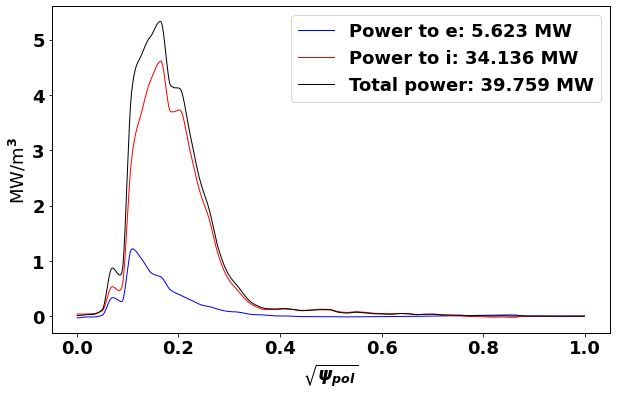

In [28]:
plt.figure(figsize=(10,6))
tot_e = str(round(total_electron_heating[0], 3))
labele = 'Power to e: ' + tot_e + ' MW'

tot_i = str(round(total_ion_heating, 3))
labeli = 'Power to i: ' + tot_i + ' MW'

tot_tot = str(round(total_ion_heating + total_electron_heating[0], 3))
labeltot = 'Total power: ' + tot_tot + ' MW'

plt.plot(sqrt_pol, electron_power_array, color='blue', label=labele)
plt.plot(sqrt_pol, ion_power_array, color='red', label=labeli)

plt.plot(sqrt_pol, electron_power_array + ion_power_array, color='black', label=labeltot)

plt.xlabel(r'$\sqrt{\psi_{pol}}$')
plt.ylabel(r'MW/m$^3$')
plt.legend()

#plt.plot(rya, -1*powers_to_max_ions)

In [29]:
savemat = np.zeros((sqrt_pol.shape[0], 3))
savemat[:, 0] = sqrt_pol
savemat[:, 1] = ion_power_array
savemat[:, 2] = electron_power_array

np.savetxt('Rf_heating.txt', savemat)


In [35]:
# save as toroidal flux txt file 
sqrt_tor = map_pol_to_tor(sqrt_pol)
ion_power_array_tor = convert(sqrt_pol, sqrt_tor, ion_power_array)(sqrt_tor)
electron_power_array_tor = convert(sqrt_pol, sqrt_tor, electron_power_array)(sqrt_tor)
savemat = np.zeros((sqrt_pol.shape[0], 3))
savemat[:, 0] = sqrt_tor
savemat[:, 1] = ion_power_array_tor
savemat[:, 2] = electron_power_array_tor

np.savetxt('Rf_heating_tor.txt', savemat)

In [39]:
# Save as toroidal flux on Haley's grid 
rho_tor_hal = np.linspace(0,1,201)
ion_power_array_tor_hal = convert(sqrt_pol, sqrt_tor, ion_power_array)(rho_tor_hal)
electron_power_array_tor_hal = convert(sqrt_pol, sqrt_tor, electron_power_array)(rho_tor_hal)
savemat = np.zeros((rho_tor_hal.shape[0], 3))
savemat[:, 0] = rho_tor_hal
savemat[:, 1] = ion_power_array_tor_hal
savemat[:, 2] = electron_power_array_tor_hal

np.savetxt('Rf_heating_tor_haleygrid.txt', savemat)

In [34]:
sqrt_tor = map_pol_to_tor(sqrt_pol)
ion_power_array_tor = convert(sqrt_pol, sqrt_tor, ion_power_array)(rya)
electron_power_array_tor = convert(sqrt_pol, sqrt_tor, electron_power_array)(rya)

check_total_poweri = np.trapz(ion_power_array_tor*dvol*(1/100)**3) 
check_total_powere = np.trapz(electron_power_array_tor*dvol*(1/100)**3)

print('Check total i power: ', check_total_poweri)
print('Check total e power: ', check_total_powere)
print('Check total i + e power: ', check_total_poweri + check_total_powere)

Check total i power:  33.94403797568361
Check total e power:  5.4327759832546345
Check total i + e power:  39.37681395893824


In [33]:
print(dvol.shape)
np.trapz(dvol*(1/100)**3)

(60,)


167.2990060110356

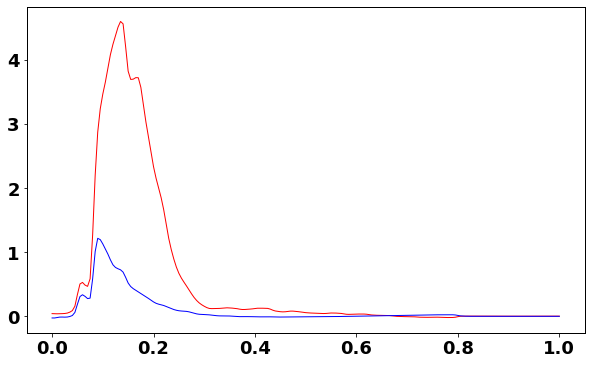

In [41]:
plt.figure(figsize=(10,6))
plt.plot(rho_tor_hal, ion_power_array_tor_hal, color='red')
plt.plot(rho_tor_hal, electron_power_array_tor_hal, color='blue')